1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import math
from scipy import optimize
import pickle
import scipy

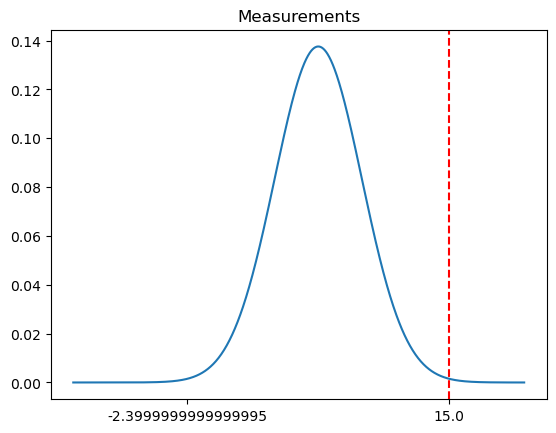

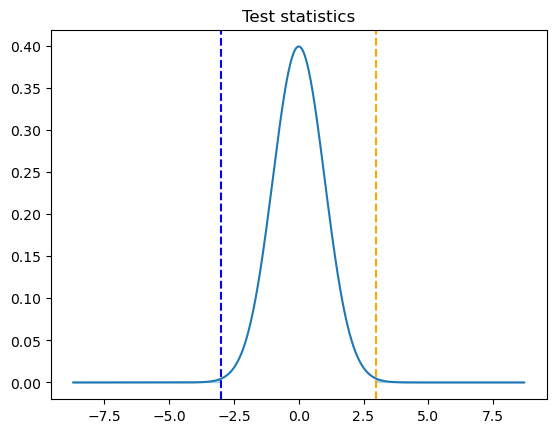

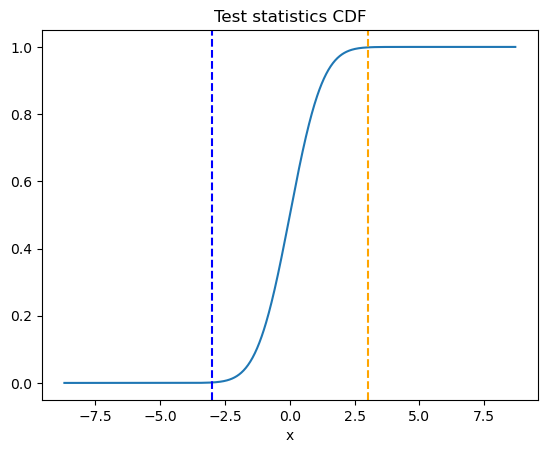

p-value = 0.0026997960632601965
Z:  3.4661629670697414
Z is larger than 3, then we can assume as statistically significant the historic average of 6.3
The probability that in a single year are observed 15 or more hurricances is  0.26997960632601964 %
The probability is smaller than alpha, we reject the null hypothesis


In [3]:
# Setting and plotting data
x0 = 15
mu = 6.3
Z = 3
sigma = (x0-mu)/Z
w = x0-mu

x = np.linspace(-10 ,20, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.figure()
plt.plot(x,y)
plt.title("Measurements")
plt.axvline(x0, linestyle='--', color='red')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])

# Plotting statics
xs = np.linspace(-(x0-mu), +(x0-mu), 1000)
ts = scipy.stats.norm.pdf(xs)

plt.figure()
plt.plot(xs, ts)
plt.title("Test statistics")
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')


cs = scipy.stats.norm.cdf(xs)

plt.figure()
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

sigma_p = scipy.stats.poisson.std(mu)
Z2 = (x0-mu)/sigma_p
print('Z: ', Z2)
print('Z is larger than 3, then we can assume as statistically significant the historic average of 6.3')
print('The probability that in a single year are observed 15 or more hurricances is ' , pvalue*100 , '%')
print('The probability is smaller than alpha, we reject the null hypothesis')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

T value:  -3.786997938137629


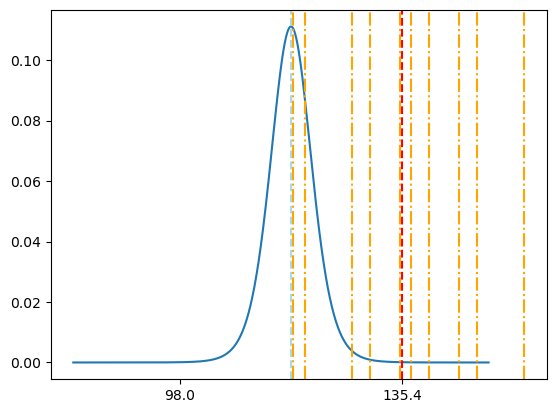

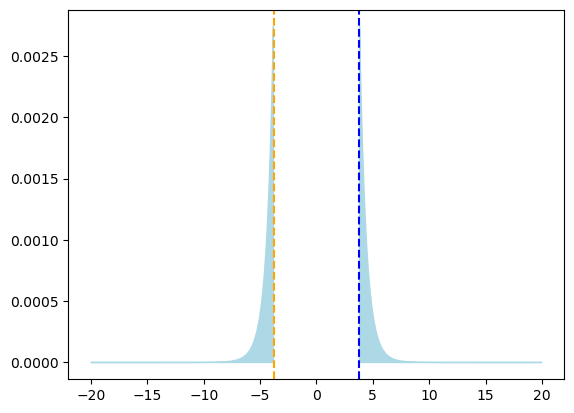

p-value = 0.004302464132864604
Alpha = 0.005
Since p-value is smaller than alpha, we reject the null hypotesis.


In [4]:
# Setting data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2 )/ 2)

sample_mean = np.mean(post)
mu = np.mean(pre)
n = len(post)
w = mu - sample_mean

T = w / (sigma * np.sqrt(2/n))
print('T value: ',T)

# Plotting data
x = np.linspace(80,150,1000)
y = stats.t.pdf(x, loc=mu, scale=sigma / np.sqrt(len(pre)), df=len(pre) - 1)
plt.plot(x, y)
plt.axvline(sample_mean, linestyle='--', color='red')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])
for l in post:
    plt.axvline(l, linestyle='-.', color='orange')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.show()

# Plot the test statistics and its pdf
plt.figure()
xs = np.linspace(-20, 20, 1000)
ts = stats.t.pdf(xs, n)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print('Alpha =' , 0.005)
print('Since p-value is smaller than alpha, we reject the null hypotesis.')

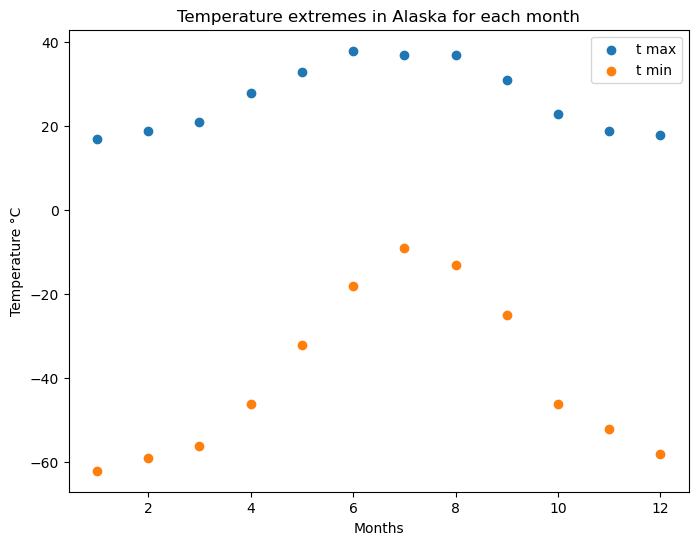

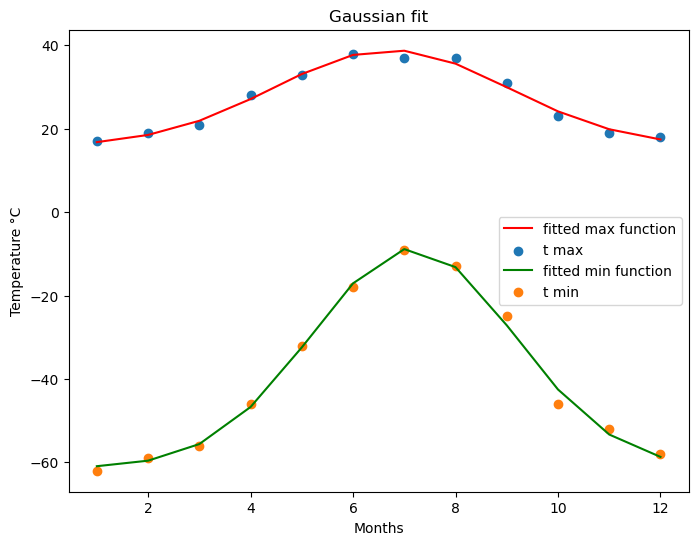

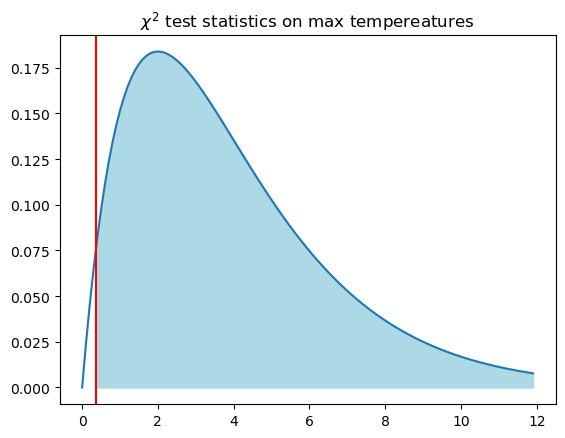

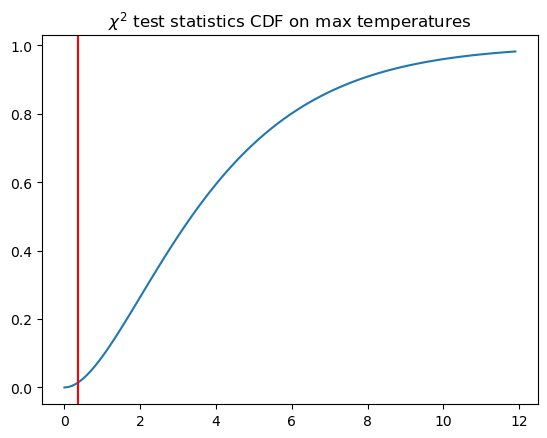

chi2 (t max) = 0.36349852723136306
p-value = 0.9853548035146282
p-value is > 0.05, the fit is considered satisfactory


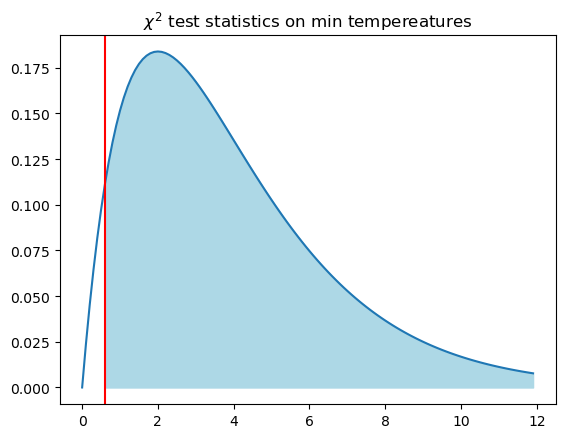

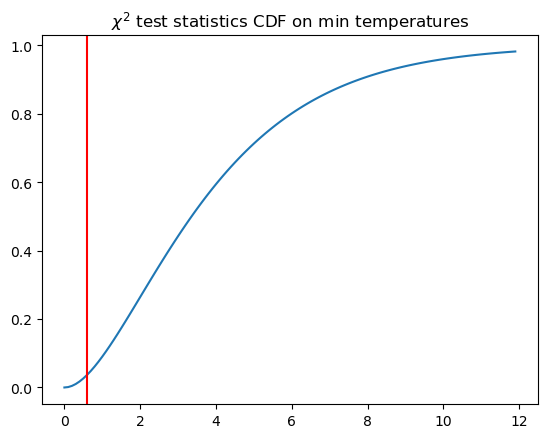

chi2 (t min) = 0.5922451895161084
p-value = 0.9639215121854521
p-value is > 0.05, the fit is considered satisfactory


In [5]:
# Setting and plotting dataset
t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
time = np.linspace(1,12,12)

plt.figure(figsize=(8,6))
plt.title('Temperature extremes in Alaska for each month')
plt.scatter(time,t_max,label='t max')
plt.scatter(time,t_min,label='t min')
plt.xlabel('Months')
plt.ylabel('Temperature °C')
plt.legend()

# Fitting data with a gaussian function

def f(x, baseline, constant, mu, sigma):
    return baseline + constant * stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(8,6))
plt.title('Gaussian fit')
plt.xlabel('Months')
plt.ylabel('Temperature °C')

popt_max, pcov_max = optimize.curve_fit(f, time, t_max,[np.mean(t_max),np.std(t_max),0,10])
plt.plot(time, f(time, *popt_max), color='red', label='fitted max function')
plt.scatter(time,t_max,label = 't max')


popt_min, pcov_min = optimize.curve_fit(f, time, t_min,[np.mean(t_min),np.std(t_min),0,10])
plt.plot(time, f(time, *popt_min), color='green', label='fitted min function')
plt.scatter(time,t_min,label = 't min')

plt.legend(loc='best')
plt.show()

# Goodness of fit (max)
p = np.arange(0,12,0.1)
y_fit_max = f(time, *popt_max)
sigma_y_max = np.sqrt(np.abs(y_fit_max))

chi2 = np.sum((np.abs(t_max - y_fit_max)**2) / sigma_y_max**2)

plt.figure()
ts = stats.chi2.pdf(p, df=len(popt_max))
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics on max tempereatures")
plt.axvline(chi2, color='red')
plt.fill_between(p, ts, where=(p > chi2), color='lightblue')

plt.figure()
plt.plot(p, stats.chi2.cdf(p, df=len(popt_max)))
plt.title("$\chi^2$ test statistics CDF on max temperatures")
plt.axvline(chi2, color='r')
plt.show()

print("chi2 (t max) =", chi2)
pvalue = 1. - stats.chi2.cdf(chi2, len(popt_max))
print("p-value =", pvalue)
print('p-value is > 0.05, the fit is considered satisfactory')

# Goodness of fit (min)
y_fit_min = f(time, *popt_min)
sigma_y_min = np.sqrt(np.abs(y_fit_min))
chi2 = np.sum((np.abs(t_min - y_fit_min)**2) / sigma_y_min**2)


plt.figure()
ts = stats.chi2.pdf(p, df=len(popt_min))
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics on min tempereatures")
plt.axvline(chi2, color='red')
plt.fill_between(p, ts, where=(p > chi2), color='lightblue')

plt.figure()
plt.plot(p, stats.chi2.cdf(p, df=len(popt_min)))
plt.title("$\chi^2$ test statistics CDF on min temperatures")
plt.axvline(chi2, color='r')
plt.show()

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
print("chi2 (t min) =", chi2)
pvalue = 1. - stats.chi2.cdf(chi2, len(popt_min))
print("p-value =", pvalue)
print('p-value is > 0.05, the fit is considered satisfactory')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


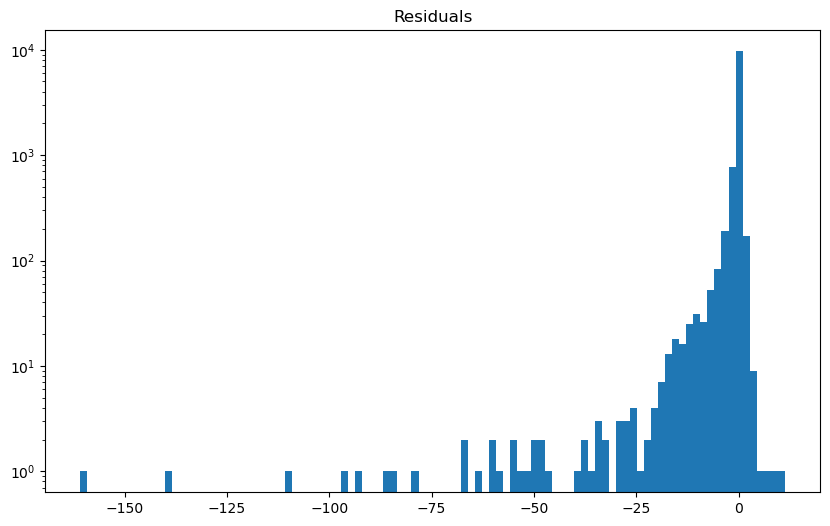

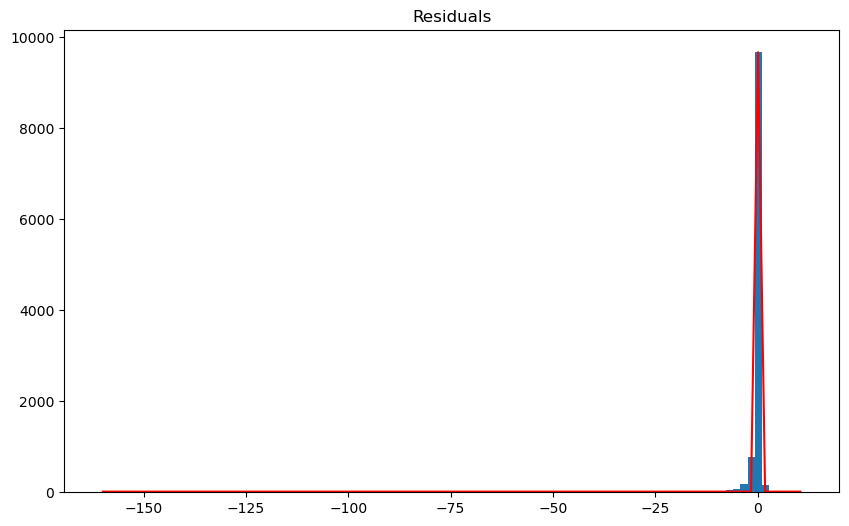

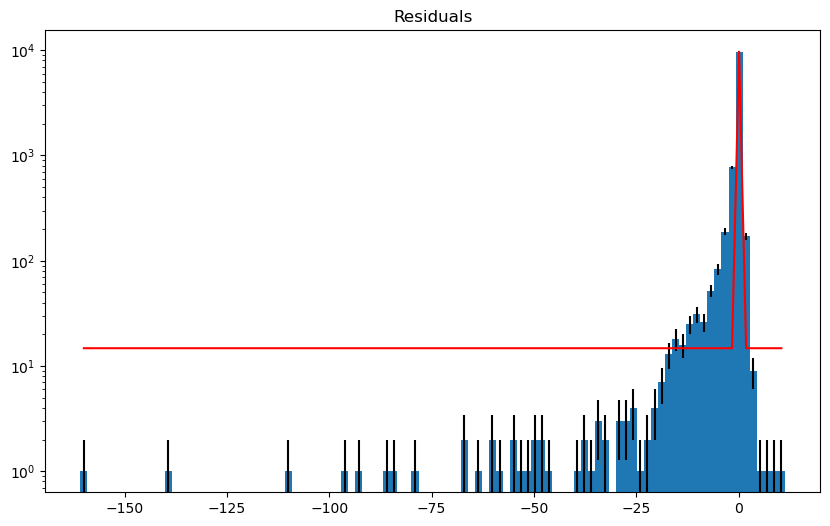

chi2 = 5788.263386769138
p-value = 0.0
p-value is < 0.05, the fit is considered unsatisfactory


In [7]:
# Loading data
filename = 'data/residuals_261.pkl'
infile = open(filename, 'rb')
data = pickle.load(infile)
infile.close()
df = pd.DataFrame(data.item())
display(df)
residuals = df['residuals']

# Plotting data
plt.figure(figsize = (10,6))
h, bins, _ = plt.hist(residuals,bins=100)
plt.title('Residuals')
plt.yscale('log')
plt.show()

# Fitting data
def f(x, baseline, c, mu, sigma):
    return baseline + c * stats.norm.pdf(x, mu, sigma)

bin_centers = 0.5*(bins[1:]+bins[:-1])
sigma = np.sqrt(h)
popt, pcov = optimize.curve_fit(f, bin_centers, h)

# Fitting without yscale
x = (np.min(residuals),np.max(residuals),100)
plt.figure(figsize = (10,6))
h, bins, _ = plt.hist(residuals,bins=100)
plt.title('Residuals')
plt.plot(bin_centers,f(bin_centers,*popt),color='red')
plt.show()

# Fitting with log yscale
plt.figure(figsize = (10,6))
h, bins, _ = plt.hist(residuals,bins=100)
plt.bar(bin_centers, h, width=0, yerr=sigma, label = 'error')
plt.title('Residuals')
plt.yscale('log')
plt.plot(bin_centers,f(bin_centers,*popt),color='red')
plt.show()

#sigma = [i for i in sigma if i != 0]
mask = np.where(h>0) 
h = h[mask]
sigma = sigma[mask]
bin_centers = bin_centers[mask]


# Peforming goodness-of-fit test
y_fit = f(bin_centers,*popt)
chi2 = np.sum(((h - y_fit)**2) / sigma**2)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, len(popt))
print("p-value =", pvalue)
print('p-value is < 0.05, the fit is considered unsatisfactory')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

,Time,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333


Best-fit values of the parameters: 
 
 a = -9.988133689134516 
 b =  12.333023014196588 
 c =  9.38411486809072


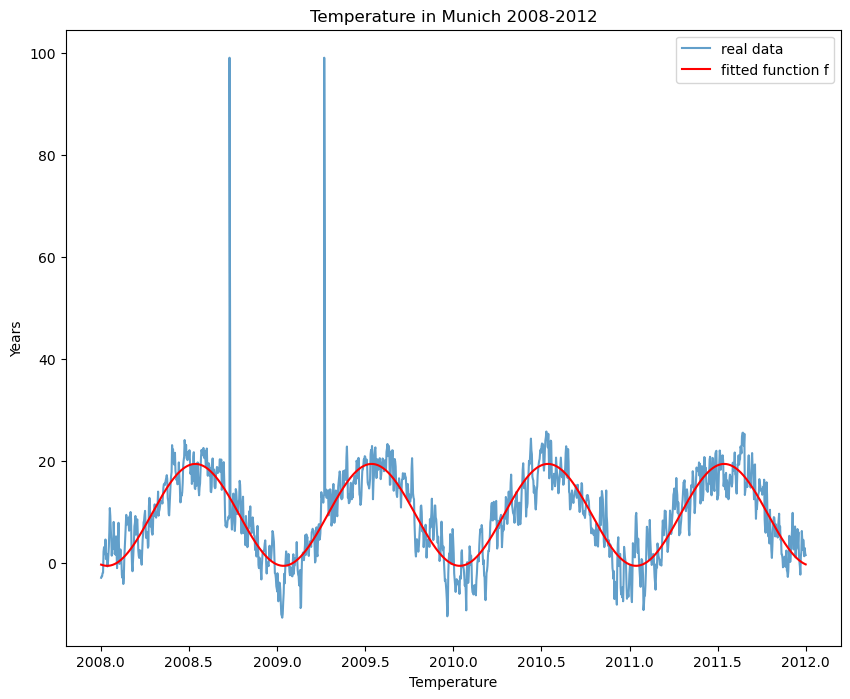

Overall average temperature in Munich from starting data: 9.38409773497604 °C
Max temperature in Munich from starting data: 99.0 °C
Min temperature in Munich from starting data: -10.7778 °C 

Overall average temperature in Munich from fitted function: 9.384097733283356 °C
Max temperature in Munich from fitted function: 19.372195568442635 °C
Min temperature in Munich from fitted function: -0.6037388871173217 °C
The parameter  is the phase shift of the cosine function. It determines the t value for the maximum and minimum of the function, then in the context of the exercise determines the time of year when the temperature is minimum or maximum.
Best-fit values of the parameters: 
 
 a = -9.982183881231062 
 b =  1.0014440576722103 
 c =  -5.9047271750555055 
 d =  9.398124918050614


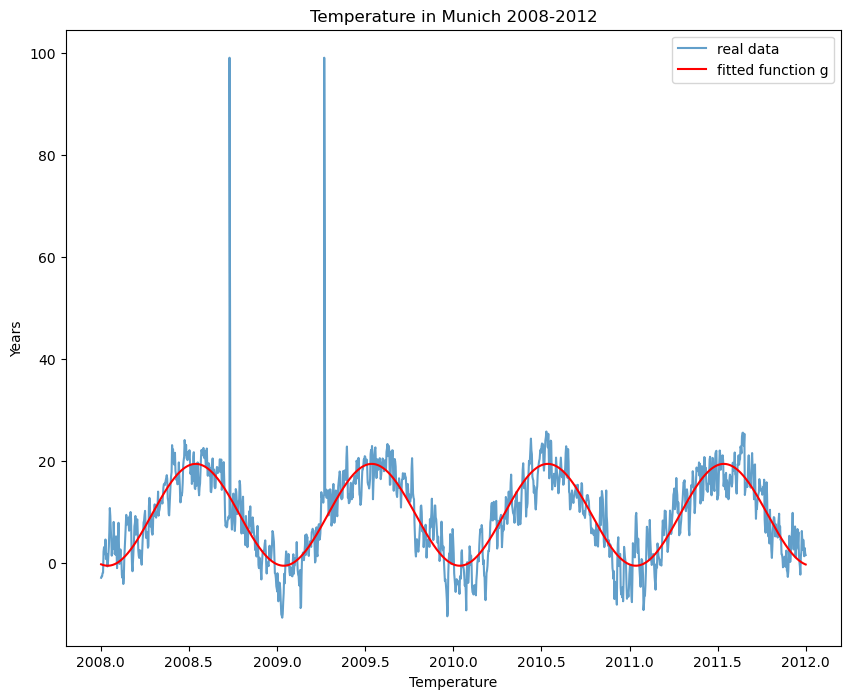

RSS f(t) = 34359.85859996652
RSS g(t)= 34352.794053704085 

p-value: 0.584 , additional parameter necessary: NO


In [11]:
# Loading data
dataset = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt',names=['Time','Temperature'], delimiter=" ")
df = dataset[dataset['Time'] >= 2008]
df = df[df['Time'] <= 2012]
display(df)
temps = df['Temperature']
time = df['Time']


# Fitting function and finding optimization function
def f(t,a,b,c):   
    t = df['Time']
    return a * np.cos(2 * np.pi * t + b) + c

#popt, pcov = optimize.curve_fit(f, time, temps, p0=[1,1,1])
popt_f, pcov = optimize.curve_fit(f, time, temps)

# Plotting and printing data
print("Best-fit values of the parameters: \n" , '\n a =' , popt_f[0] , '\n b = ' , popt_f[1], '\n c = ' , popt_f[2])
plt.figure(figsize=(10,8))
plt.plot(df['Time'], df['Temperature'],alpha = 0.7,label = 'real data')
plt.plot(time, f(time, popt_f[0], popt_f[1], popt_f[2]), color='red', label='fitted function f')
plt.title('Temperature in Munich 2008-2012')
plt.xlabel('Temperature')
plt.ylabel('Years')
plt.legend()
plt.show()

# Analyzing the data
fit_func= f(time, popt_f[0], popt_f[1], popt_f[2])
print('Overall average temperature in Munich from starting data:', np.mean(df['Temperature']), '°C')
print('Max temperature in Munich from starting data:', np.max(temps), '°C')
print('Min temperature in Munich from starting data:', np.min(temps), '°C \n')

print('Overall average temperature in Munich from fitted function:', np.mean(fit_func), '°C')
print('Max temperature in Munich from fitted function:', np.max(fit_func), '°C')
print('Min temperature in Munich from fitted function:', np.min(fit_func), '°C')

print('The parameter  is the phase shift of the cosine function. It determines the t value for the maximum and minimum of the function, then in the context of the exercise determines the time of year when the temperature is minimum or maximum.')


# Fitting with the g(x) function
def g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d

popt_g, pcov = optimize.curve_fit(g, time, temps)
print("Best-fit values of the parameters: \n" , '\n a =' , popt_g[0] , '\n b = ' , popt_g[1], '\n c = ' , popt_g[2], '\n d = ', popt_g[3])

plt.figure(figsize=(10,8))
plt.plot(df['Time'], df['Temperature'], alpha=0.7, label='real data')
plt.plot(time, g(time, *popt_g), color='red', label='fitted function g')
plt.title('Temperature in Munich 2008-2012')
plt.xlabel('Temperature')
plt.ylabel('Years')
plt.legend()
plt.show()

# Comptuing Fisher F-test
alpha = 0.05

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    else: print('P-Value: ', pvalue)
    return

ssr_f = np.sum((df['Temperature'] - f(df['Time'],*popt_f))**2)
ssr_g = np.sum((df['Temperature'] - g(df['Time'],*popt_g))**2)
print('RSS f(t) =', ssr_f)
print('RSS g(t)=', ssr_g,'\n')

Ftest(ssr_f, ssr_g, len(popt_f), len(popt_g), len(df), verbose=True)